### Seasonal Autoregressive Integrated Moving-Average with Exogenous Regressors

In statistics and econometrics, and in particular in time series analysis, an autoregressive integrated moving average (ARIMA) model is a generalization of an autoregressive moving average (ARMA) model. Both of these models are fitted to time series data either to better understand the data or to predict future points in the series (forecasting). ARIMA models are applied in some cases where data show evidence of non-stationarity, where an initial differencing step (corresponding to the "integrated" part of the model) can be applied one or more times to eliminate the non-stationarity.

This class allows two different underlying representations of ARMA models as state space models: that of Hamilton and that of Harvey. Both are equivalent in the sense that they are analytical representations of the ARMA model, but the state vectors of each have different meanings. For this reason, maximum likelihood does not result in identical parameter estimates and even the same set of parameters will result in different loglikelihoods.

The Harvey representation is convenient because it allows integrating differencing into the state vector to allow using all observations for estimation.

In this implementation of differenced models, the Hamilton representation is not able to accommodate differencing in the state vector, so simple_differencing (which performs differencing prior to estimation so that the first d + sD observations are lost) must be used.

##### References
* [wiki](https://en.wikipedia.org/wiki/Autoregressive_integrated_moving_average)
* [statsmodels](https://www.statsmodels.org/dev/generated/statsmodels.tsa.statespace.sarimax.SARIMAX.html)

# Imports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.arima_model import ARIMA
from random import random

# Data

In [2]:
df=pd.read_csv("/kaggle/input/covid19-global-forecasting-week-1/train.csv",usecols=['Lat','Province/State','Country/Region','Date','ConfirmedCases','Fatalities'])
df.fillna(' ',inplace=True)
df['Lat']=df['Province/State']+df['Country/Region']
df.drop('Province/State',axis=1,inplace=True)
df.drop('Country/Region',axis=1,inplace=True)
countries_list=df.Lat.unique()
df1=[]
for i in countries_list:
    df1.append(df[df['Lat']==i])
print("we have "+ str(len(df1))+" regions in our dataset")

we have 284 regions in our dataset


### Data Visualization



To-do

# Prediction/Forecasting

In [3]:
submit_confirmed=[]
submit_fatal=[]
for i in df1:
    # contrived dataset
    data = i.ConfirmedCases.astype('int32').tolist()
    # fit model
    try:
        model = SARIMAX(data, order=(2,1,0), seasonal_order=(1,1,0,12))#seasonal_order=(1, 1, 1, 1))
        #model = ARIMA(data, order=(3,1,2))
        model_fit = model.fit(disp=False)
        # make prediction
        predicted = model_fit.predict(len(data), len(data)+34)
        new=np.concatenate((np.array(data),np.array([int(num) for num in predicted])),axis=0)
        submit_confirmed.extend(list(new[-43:]))
    except:
        submit_confirmed.extend(list(data[-10:-1]))
        for j in range(34):
            submit_confirmed.append(data[-1]*2)
    
    # contrived dataset
    data = i.Fatalities.astype('int32').tolist()
    # fit model
    try:
        model = SARIMAX(data, order=(2,1,0), seasonal_order=(1,1,0,12))#seasonal_order=(1, 1, 1, 1))
        #model = ARIMA(data, order=(3,1,2))
        model_fit = model.fit(disp=False)
        # make prediction
        predicted = model_fit.predict(len(data), len(data)+34)
        new=np.concatenate((np.array(data),np.array([int(num) for num in predicted])),axis=0)
        submit_fatal.extend(list(new[-43:]))
    except:
        submit_fatal.extend(list(data[-10:-1]))
        for j in range(34):
            submit_fatal.append(data[-1]*2)

df_submit=pd.concat([pd.Series(np.arange(1,1+len(submit_confirmed))),pd.Series(submit_confirmed),pd.Series(submit_fatal)],axis=1)

/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:994: UserWarning: Non-stationary starting seasonal autoregressive Using zeros as starting parameters.
  warn('Non-stationary starting seasonal autoregressive'
/opt/conda/lib/python3.6/site-packages/statsmodels/tsa/statespace/sarimax.py:963: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  "Check mle_retvals", ConvergenceWarning)
/opt/conda/lib/python3.6/site-packages/statsmodels/base/model.py:568: ConvergenceWarning: Maximum Likelihood op

# Submission

In [4]:
#df_submit.interpolate(method='pad', xis=0, inplace=True)
df_submit=df_submit.fillna(method='pad').astype(int)
df_submit.to_csv('submission.csv',header=['ForecastId','ConfirmedCases','Fatalities'],index=False)

# Visualisation of Predictions

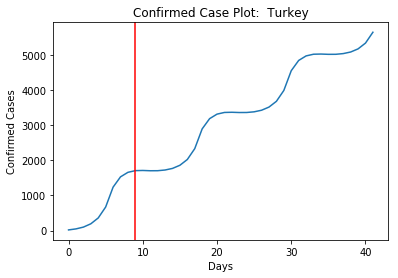

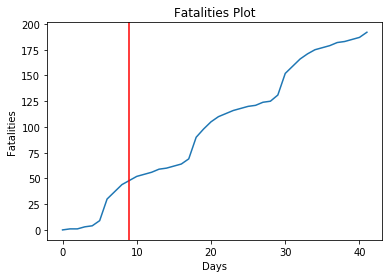

In [5]:
# contrived dataset
n=213 # select country
data = df1[n].ConfirmedCases.astype('int32').tolist()
# fit model
new=submit_confirmed[9159:9201]
plt.plot(new)
plt.axvline(x=9,color='r')
plt.title("Confirmed Case Plot: "+str(df1[n].iloc[0,0]))
plt.xlabel('Days')
plt.ylabel('Confirmed Cases')
plt.show()


# contrived dataset
data = df1[n].Fatalities.astype('int32').tolist()
new=submit_fatal[9159:9201]
plt.plot(new)
plt.axvline(x=9,color='r')
plt.title("Fatalities Plot")
plt.xlabel('Days')
plt.ylabel('Fatalities')
plt.show()